In [4]:
import pyart
import matplotlib.pyplot as plt
from matplotlib import ticker, colors
import numpy as np
import os
from JSAnimation import IPython_display
from matplotlib.animation import FuncAnimation

%matplotlib inline


In [5]:
indir = '/Volumes/LaCie/CPOL_for_marcus/'
all_files = os.listdir(indir)
ppis = []
for fl in all_files:
    if 'PPI' in fl and os.stat(os.path.join(indir, fl)).st_size > 900000:
        ppis.append(os.path.join(indir, fl))
ppis.sort()

In [6]:
radar = pyart.io.read(ppis[100], file_field_names =True, use_rsl=True)

In [7]:
print(radar.fields.keys())

['ZD', 'SW', 'VR', 'DZ', 'ZT', 'PH', 'RH']


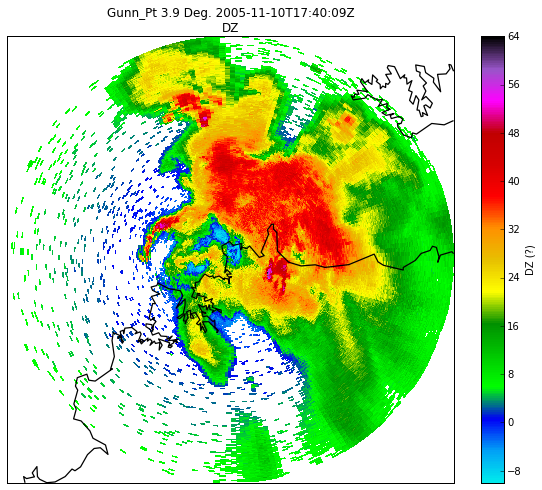

In [8]:
display = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure(figsize = [10,8])
display.plot_ppi_map('DZ', sweep = 3, resolution = 'i',
                    vmin = -10, vmax = 64, mask_outside = False,
                    cmap = pyart.graph.cm.NWSRef)

In [12]:
#kwrgsss = {'sweep' : 3, 'min_lon' : min_lon, 'max_lon' : max_lon, 
#           'min_lat' : min_lat, 'max_lat' : max_lat, 'resolution' : 'l'}
kwrgsss = {'sweep' : 3, 'resolution' : 'l'}

ppi_subset = ppis[500:1800]

def update_radar(n):
    global fig, ax1, sx2, ax3, ax4, cmap
    display = pyart.graph.RadarMapDisplay( pyart.io.read(ppi_subset[5*n], file_field_names =True, use_rsl=True))
    ax1.cla()
    display.plot_ppi_map('ZD', 
                         vmin = -1, vmax = 5, colorbar_flag = False, ax = ax1, **kwrgsss)
    ax2.cla()
    display.plot_ppi_map('DZ',vmin = -8, vmax = 64,
                         colorbar_flag = False, ax = ax2,
                         cmap = pyart.graph.cm.NWSRef, **kwrgsss)
    ax3.cla()
    display.plot_ppi_map('PH', vmin =-180, vmax = 180,
                         colorbar_flag = False, ax = ax3, **kwrgsss)
    ax4.cla()
    display.plot_ppi_map('RH', vmin = 0, vmax = 1,
                         colorbar_flag = False, ax = ax4,**kwrgsss)
    

In [ ]:
display = pyart.graph.RadarMapDisplay(pyart.io.read(ppi_subset[0], file_field_names =True, use_rsl=True))
fig = plt.figure(figsize = [12,8])
ax1 = plt.subplot(2, 2, 1) 
display.plot_ppi_map('ZD', vmin = -1, vmax = 5, **kwrgsss)
cbax=plt.gca()
ax2 = plt.subplot(2, 2, 2); display.plot_ppi_map('DZ',vmin = -8, vmax = 64, cmap = pyart.graph.cm.NWSRef,
                                                 **kwrgsss)
ax3 = plt.subplot(2, 2, 3); display.plot_ppi_map('PH', vmin =-180, vmax = 180, **kwrgsss)
ax4 = plt.subplot(2, 2, 4); display.plot_ppi_map('RH', vmin = 0, vmax = 1, **kwrgsss)
FuncAnimation(fig, update_radar, interval=200, frames= 100)